Get started
===
Q2. [10 marks] Examine the parallel data and answer the following questions.
---
1.Plot (choose sensible graphs) the distribution of sentence lengths in the English and Japanese and their correlation. 

What do you infer from this about translating between these languages?

In [10]:
import os
work_dir = os.getcwd()
data = os.path.join(work_dir, 'data')
text_en = os.path.join(data, 'text.en')
text_fr = os.path.join(data, 'text.fr')

text.en most frequent length: [(8, 1660), (7, 1554), (9, 1485), (10, 1149), (6, 1137)]


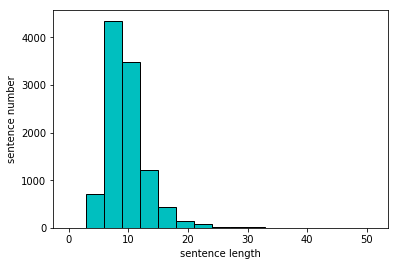

In [157]:
def plot_distribution(text_, color='c', edgecolor="black"):
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from collections import Counter
    with open(text_) as f:
        text_len = [len(line.split()) for line in f.readlines()]
    plt.hist(text_len, bins=np.arange(start=0, stop=max(text_len), step=3), color=color, edgecolor=edgecolor)
    plt.xlabel('sentence length')
    plt.ylabel('sentence number')
    count = Counter(text_len)
    print(text_[-7:],"most frequent length:", count.most_common(5))  
plot_distribution(text_en)

text.fr most frequent length: [(12, 1098), (11, 1038), (13, 1006), (10, 908), (14, 880)]


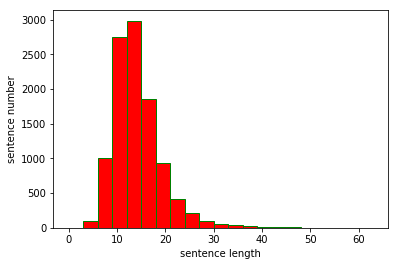

In [158]:
plot_distribution(text_fr, 'r', 'g')

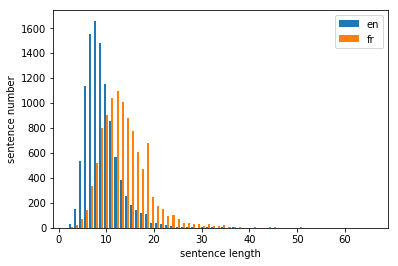

In [175]:
# with open(text_en) as f:
#     text_len = [len(line.split()) for line in f.readlines()]
#     max_len_en = max(text_len)
# with open(text_en) as f:
#     text_len = [len(line.split()) for line in f.readlines()]
#     max_len_fr = max(text_len)
# bins_max = max(max_len_en, max_len_fr) # 54
plt.hist([en_len,fr_len],bins=60, label=['en', 'fr'])
plt.ylabel('sentence number')
plt.xlabel('sentence length')
_ =plt.legend()

What do you infer from this about translating between these languages?

---
> Average english sentences have shorter length than Japanese..

2.How many word tokens are in the English data? In the Japanese?

In [141]:
def get_token_num(text_):
    with open(text_) as f:
        text_len = [len(line.split()) for line in f.readlines()]
    token_num = sum(text_len)
#         print(token_num)
    return token_num
print('English word tokens number:', get_token_num(text_en))
print('Japanese word tokens number:', get_token_num(text_fr))

English word tokens number: 97643
Japanese word tokens number: 143580


3.How many word types are in the English data? In the Japanese data?

In [150]:
def get_word_types(text_):
    token_list = []
    with open(text_) as f:
        text_tokens = [line.split() for line in f.readlines()]
        for i in text_tokens: token_list.extend(i)
        word_type = set(token_list)
        return len(word_type)
print('English word types:' ,get_word_types(text_en))
print('japanese word types:' ,get_word_types(text_fr))

English word types: 7211
japanese word types: 8251


4.How many word tokens will be replaced by _UNK in English? In Japanese?

In [189]:
def get_UNK_nums(text_):
    from collections import Counter
    with open(text_) as f:
        token_list = []
        num_UNK = 0
        text_tokens = [line.split() for line in f.readlines()]
        for i in text_tokens: token_list.extend(i)
    token_counter = Counter(token_list)
    UNK_list = [k for k,v in token_counter.items() if v==1]
    return len(UNK_list)
print('English UNK numbers:',get_UNK_nums(text_en))
print('Japanese UNK numbers:',get_UNK_nums(text_en))

English UNK numbers: 3384


5.Given the observations above, how do you think the NMT system will be affected by differences in sentence length, type/ token ratios, and unknown word handling?

Part 2: Exploring the model [30 marks]
===